Contexte du projet
L'épisode 2 a mis en évidence que la technique de "data augmentation" permet de diminuer de manière très efficace le surapprentissage mais n'améliore que très peu (dans notre exemple !) la performance de différenciation d'une image d'un alien d'une image d'un prédator. Dans l'épisode 3, nous allons utiliser la technique dite de "transfer learning" et plus particulièrement d'extractions de caractéristiques ("features extraction") pour améliorer les performances du programme de vision par ordinateur. La procédure à suivre est la suivante :

Charger le modèle VGG-16 (mais qu'est-ce donc que ce VGG-16 ?) ;
Extraire les caractéristiques des images des jeux d'apprentissage, de validation et de test via VGG-16 ;
Entrainer un perceptron multi-couches avec le code Keras/TensorFlow suivant pour prédire à partir des caractéristiques extraites par VGG-16 la sortie (Alien ou Prédator) :
model = models.Sequential()

model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))

model.add(layers.Dense(units=1, activation='sigmoid'))

Conclure.
​

* Tâches optionnelles, pour les plus courageuses et les plus courageux d'entre vous :

Tester d'autres modèles que VGG-16 pour effectuer l'étape de "features extraction" ;
Tester d'autres modèles de Machine Learning (par exemple SVM) pour effectuer l'étape de supervision.

Index du Code :

Introduction au projet et à l'utilisation de la technique de "transfer learning" avec VGG-16.
Chargement des Bibliothèques :

Importation des bibliothèques nécessaires, y compris TensorFlow, Pandas, NumPy, Seaborn, et Matplotlib.
Spécification des Répertoires de Données :

Définition des chemins vers les répertoires de données d'entraînement, de validation et de test.
Création des Datasets :

Utilisation de TensorFlow pour créer des datasets d'images à partir des répertoires spécifiés.
Conversion en Numpy Arrays :

Transformation des datasets en tableaux NumPy pour l'entraînement.
Prétraitement des Images avec preprocess_input :

Application de la fonction preprocess_input de VGG-16 pour prétraiter les images.
Extraction des Caractéristiques avec VGG-16 :

Chargement du modèle VGG-16 pré-entraîné et extraction des caractéristiques des images d'entraînement, de validation et de test.
Transformation en Vecteurs 2D :

Transformation des caractéristiques extraites en vecteurs 2D pour être utilisés dans le modèle de machine learning.
Création du Modèle de Machine Learning :

Construction d'un modèle de machine learning à l'aide de Keras, comprenant deux couches de neurones avec des fonctions d'activation appropriées.
Compilation du Modèle :

Compilation du modèle en spécifiant l'optimiseur, la fonction de perte et les métriques d'évaluation.
Entraînement du Modèle :
Entraînement du modèle avec les caractéristiques extraites des données d'entraînement.
Récupération de l'Historique d'Entraînement :
Stockage de l'historique d'entraînement du modèle, y compris les valeurs de perte et d'exactitude.
Visualisation de la Perte et de l'Exactitude :
Traçage des courbes de perte et d'exactitude d'entraînement et de validation.
Évaluation du Modèle :
Évaluation du modèle sur les jeux d'entraînement, de validation et de test, en affichant la perte et l'exactitude.
Conclusion :
Conclusion générale du projet et des résultats obtenus.
Cet index vous permettra de mieux organiser et documenter votre notebook en y insérant des sections distinctes pour chaque étape du code.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import metrics
pd.set_option('display.max_columns', None)

In [2]:
# Spécifier les répertoires pour les données d'entraînement, de test et de validation
train_path = "Data/Train"
valid_path = "Data/Validation"
test_path = "Data/Validation"

In [3]:
# Création de datasets au format approprié
train_ds = tf.keras.utils.image_dataset_from_directory(train_path, seed=123, image_size=(150, 150), batch_size=494)
valid_ds = tf.keras.utils.image_dataset_from_directory(valid_path, seed=123, image_size=(150, 150), batch_size=494)
test_ds = tf.keras.utils.image_dataset_from_directory(test_path, seed=123, image_size=(150, 150), batch_size=494)

Found 494 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


In [4]:
# Conversion en array Numpy
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

X_train = np.array(image_batch)
y_train = np.array(labels_batch)

for image_valid_batch, labels_valid_batch in valid_ds:
  print(image_valid_batch.shape)
  print(labels_valid_batch.shape)
  break

X_valid = np.array(image_valid_batch)
y_valid = np.array(labels_valid_batch)

for image_test_batch, labels_test_batch in test_ds:
  print(image_test_batch.shape)
  print(labels_test_batch.shape)
  break

X_test = np.array(image_test_batch)
y_test = np.array(labels_test_batch)

(494, 150, 150, 3)
(494,)
(200, 150, 150, 3)
(200,)
(200, 150, 150, 3)
(200,)


In [5]:
# Prétraitement des images avec preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input

train_ds = preprocess_input(X_train)
valid_ds = preprocess_input(X_valid)
test_ds = preprocess_input(X_test)

In [6]:
# Transformation des images avec VGG16 en caractéristiques
from tensorflow.keras.applications.vgg16 import VGG16

model_base = VGG16(include_top=False,
    weights="imagenet", #'imagenet' ou path to the weights file to be loaded ?
    input_tensor=None,
    input_shape=None
    )

In [7]:
# nouvelles variables de "caractéristiques" de chaque jeu
features_train = model_base.predict(train_ds)
features_valid = model_base.predict(valid_ds)
features_test = model_base.predict(test_ds)

7/7 [==============================] - 12s 2s/step


In [8]:
features_train.shape # vecteur en 4D

(494, 4, 4, 512)

In [9]:
# transformation en vecteurs 2D : (nbre_features, 4*4*512)
features_train_flatten = np.reshape(features_train, (494, 8192))
features_valid_flatten = np.reshape(features_valid, (200, 8192))
features_test_flatten = np.reshape(features_test, (200, 8192))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
#model.add(model_base) # Enlève modèle VGG16 car pas besoin de le faire : fait avec .predict
#model.add(Flatten()) # transforme un tenseur de n dimensions en 2D: on enlève ici car features_flatten + haut
model.add(layers.Dense(units=256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dense(units=1, activation='sigmoid'))

In [11]:
# Optimiser sur les métriques
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import binary_crossentropy
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [12]:
nb_batch = 494 # full batch

# Entrainement avec full batch, 100 epochs
history = model.fit(features_train_flatten, y_train,
    validation_data=(features_valid_flatten, y_valid),
    batch_size=nb_batch,
    epochs=100,
    verbose=0
)

In [13]:
# Récupérez l'historique d'entraînement
history_df = pd.DataFrame(history.history)

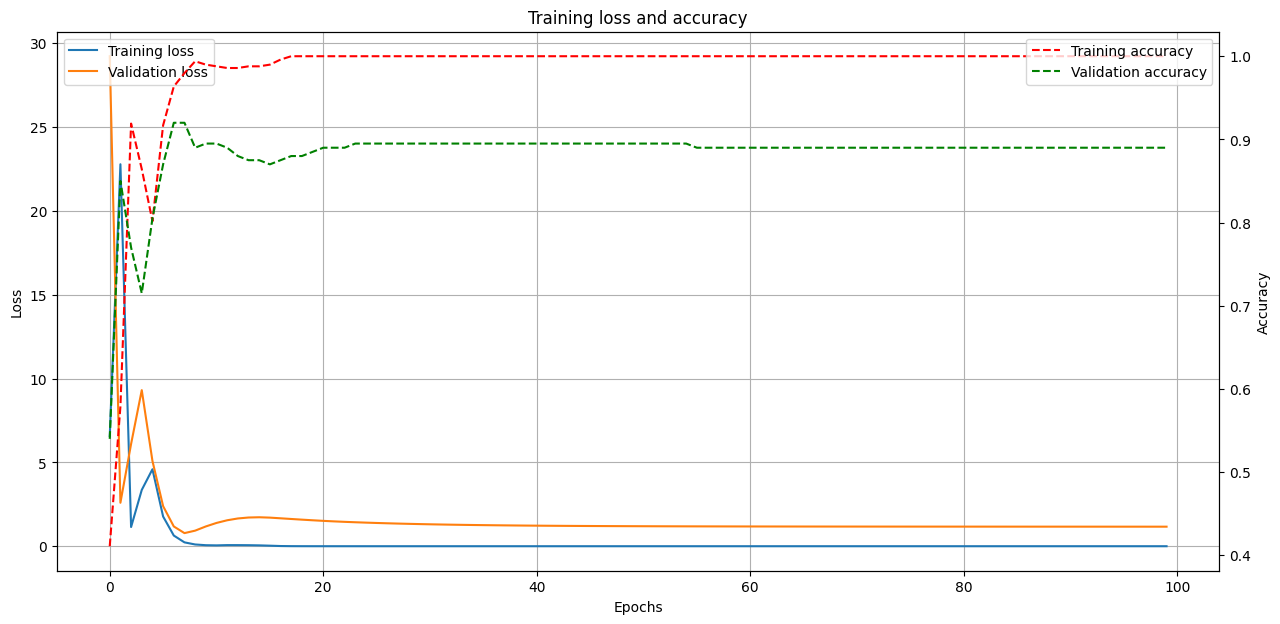

In [14]:
# Tracer la perte et l'exactitude d'entraînement
ax = history_df[['loss', 'val_loss']].plot(figsize=(15, 7))
ax2 = ax.twinx()
history_df[['accuracy', 'val_accuracy']].plot(ax=ax2, linestyle='dashed', color=['r', 'g'])
ax.grid()
_ = ax.set(title="Training loss and accuracy", xlabel="Epochs")
_ = ax.set_ylabel("Loss")
_ = ax2.set_ylabel("Accuracy")
_ = ax.legend(["Training loss", "Validation loss"], loc='upper left')
_ = ax2.legend(["Training accuracy", "Validation accuracy"], loc='upper right')
plt.show()

In [16]:
# Évaluez le modèle sur le jeu d'entraînement
train_scores = model.evaluate(features_train_flatten, y_train, verbose=0)
print("Scores sur le jeu d'entraînement:")
print("Loss: {:.4f}".format(train_scores[0]))
print("Accuracy: {:.2f}%".format(train_scores[1] * 100))

# Évaluez le modèle sur le jeu de validation
valid_scores = model.evaluate(features_valid_flatten, y_valid, verbose=0)
print("\nScores sur le jeu de validation:")
print("Loss: {:.4f}".format(valid_scores[0]))
print("Accuracy: {:.2f}%".format(valid_scores[1] * 100))

# Évaluez le modèle sur le jeu de test
test_scores = model.evaluate(features_test_flatten, y_test, verbose=0)
print("\nScores sur le jeu de test:")
print("Loss: {:.4f}".format(test_scores[0]))
print("Accuracy: {:.2f}%".format(test_scores[1] * 100))


Scores sur le jeu d'entraînement:
Loss: 0.0000
Accuracy: 100.00%

Scores sur le jeu de validation:
Loss: 1.1657
Accuracy: 89.00%

Scores sur le jeu de test:
Loss: 1.1657
Accuracy: 89.00%
